In [1]:
from modules.training_models.best_cnn_mel_spectrogram import SpeechEmotionRecognitionModelUsingMelSpectrogram
from keras.models import load_model
import matplotlib.pyplot as plt


In [2]:
def plot_loss(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss) + 1)

    plt.plot(epochs, train_loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_accuracy(history):
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(train_accuracy) + 1)

    plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [3]:
ser_model = SpeechEmotionRecognitionModelUsingMelSpectrogram()

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
ser_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 512)      │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,931,975 (15.00 MB)

 Trainable params: 3,931,975 (15.00 MB)

 Non-trainable params: 0 (0.00 B)

**Thử nghiệm mô hình trên 256 n_mels**

In [5]:
from config.vi_config import VietnameseDatasetConfig

In [6]:
def get_n_mels_paths(n_mels, Config):
    train_path = Config.n_mels_config[n_mels].train_path
    validation_path = Config.n_mels_config[n_mels].validation_path
    test_path = Config.n_mels_config[n_mels].test_path
    return train_path, validation_path, test_path

In [7]:
def get_train_test_val_data(n_mels, Config):
    train_path, test_path, val_path = get_n_mels_paths(n_mels, Config)
    X_train, y_train = ser_model.process_data(train_path)
    X_val, y_val = ser_model.process_data(val_path)
    X_test, y_test = ser_model.process_data(test_path)
    return X_train, y_train, X_val, y_val, X_test, y_test

In [8]:
def train_model(n_mels, Config):
    X_train, y_train, X_val, y_val, X_test, y_test = get_train_test_val_data(n_mels, Config)
    history = ser_model.train(X_train, y_train, X_val, y_val, n_mels)
    plot_loss(history)
    plot_accuracy(history)
    model = load_model(f'best_cnn_model_weights_using_mel_spectrogram_{n_mels}.keras')
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

In [9]:
def fine_tune_model(n_mels, Config):
    X_train, y_train, X_val, y_val, X_test, y_test = get_train_test_val_data(n_mels, Config)
    X_train, y_train = ser_model.balanced_resampling(X_train, y_train)
    history = ser_model.fine_tune(X_train, y_train, X_val, y_val, model_path=r"D:\data_analysis\speech_emotion_recognition\best_model\best_cnn_model_weights_using_mel_spectrogram_256.keras", n_mels=512)
    ser_model.plot_training_history(history)
    ser_model.plot_confusion_matrix(X_test, y_test, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])

Original class distribution: Counter({0: 291, 4: 237, 2: 96, 1: 78, 5: 66, 3: 63, 6: 54})
Balanced class distribution: Counter({6: 291, 0: 54, 1: 54, 2: 54, 3: 54, 4: 54, 5: 54})
Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.2940 - loss: 3.6965 - val_accuracy: 0.2842 - val_loss: 2.0094 - learning_rate: 1.0000e-04
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.5115 - loss: 1.3971 - val_accuracy: 0.3552 - val_loss: 1.6276 - learning_rate: 1.0000e-04
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.6382 - loss: 0.9582 - val_accuracy: 0.4208 - val_loss: 1.4954 - learning_rate: 1.0000e-04
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.6965 - loss: 0.8051 - val_accuracy: 0.4590 - val_loss: 1.4966 - learning_rate: 1.0000e-04
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.7373 - loss: 0.7239 - val_accuracy: 0.4973 - val_loss: 1.4202 - learning_rate: 1.0000e-04
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 

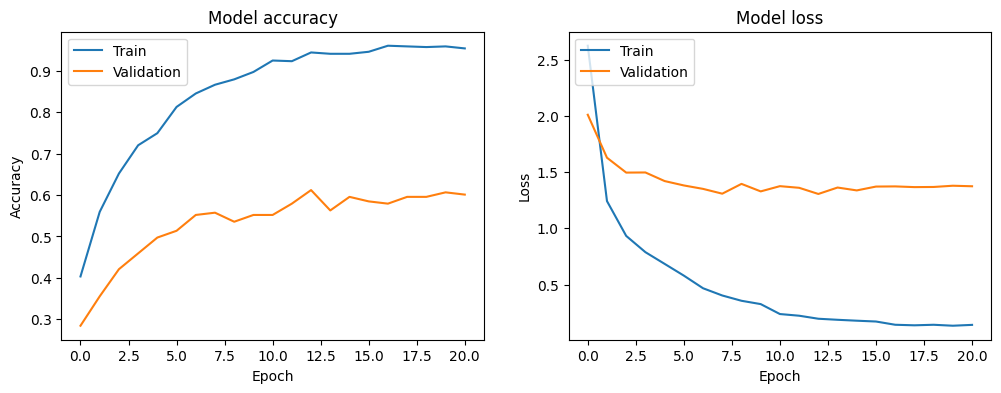

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


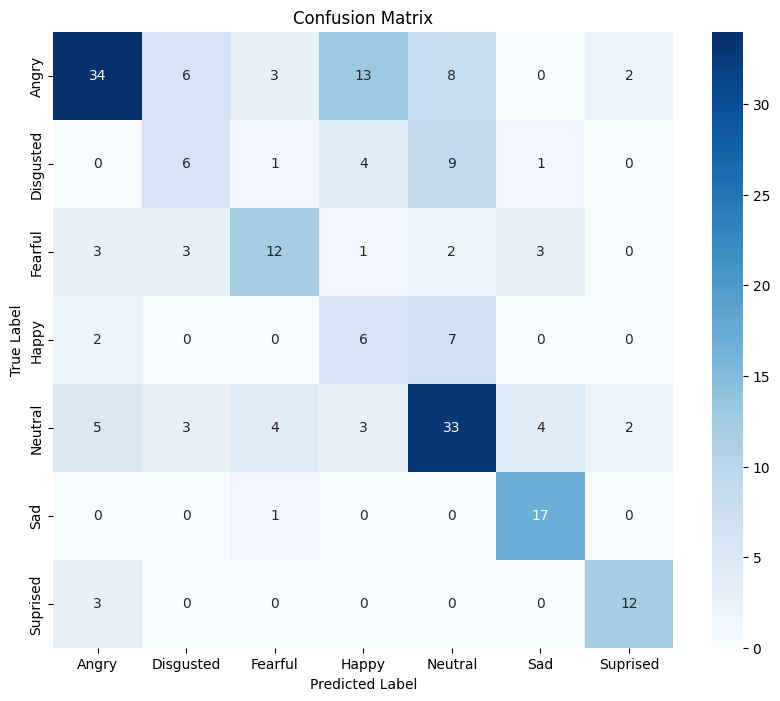

In [10]:
fine_tune_model(256, VietnameseDatasetConfig)

In [11]:
train_model(128)

TypeError: train_model() missing 1 required positional argument: 'Config'

In [ ]:
from config.eng_config import Config

Epoch 1/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 79s 179ms/step - accuracy: 0.1639 - loss: 1.9191 - val_accuracy: 0.2264 - val_loss: 1.9068 - learning_rate: 1.0000e-04
Epoch 2/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 79s 181ms/step - accuracy: 0.2458 - loss: 1.8075 - val_accuracy: 0.3864 - val_loss: 1.6033 - learning_rate: 1.0000e-04
Epoch 3/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 78s 180ms/step - accuracy: 0.3837 - loss: 1.5591 - val_accuracy: 0.5089 - val_loss: 1.3499 - learning_rate: 1.0000e-04
Epoch 4/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 83s 190ms/step - accuracy: 0.4873 - loss: 1.3267 - val_accuracy: 0.5386 - val_loss: 1.1844 - learning_rate: 1.0000e-04
Epoch 5/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 81s 186ms/step - accuracy: 0.5354 - loss: 1.1953 - val_accuracy: 0.5666 - val_loss: 1.1063 - learning_rate: 1.0000e-04
Epoch 6/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 80s 183ms/step - accuracy: 0.5554 - loss: 1.1281 - val_accuracy: 0.5799 - val_loss: 1.0650 - learning_rate: 1.0000e-04
Epoch 7/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 79s 18

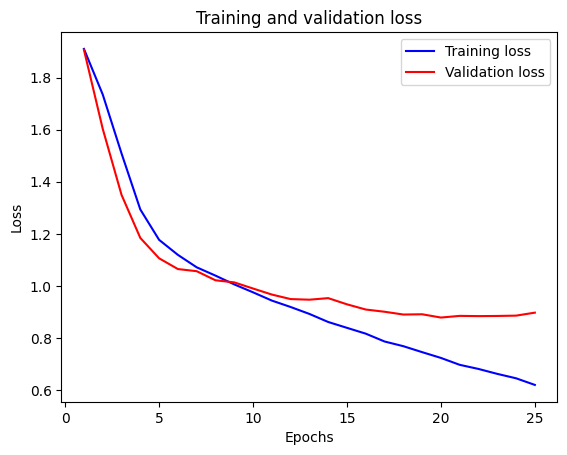

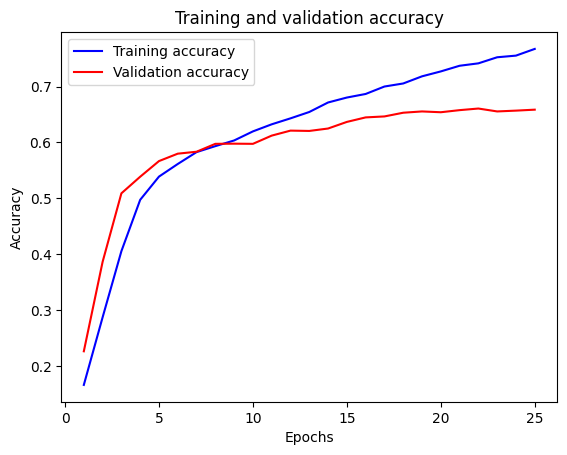

110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6855 - loss: 0.8665
Test Loss: 0.8958102464675903
Test Accuracy: 0.669232964515686


In [ ]:
train_model(256, Config)

Epoch 1/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 108s 245ms/step - accuracy: 0.1914 - loss: 1.8797 - val_accuracy: 0.4002 - val_loss: 1.5705 - learning_rate: 8.0000e-05
Epoch 2/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 101s 230ms/step - accuracy: 0.4159 - loss: 1.4952 - val_accuracy: 0.5208 - val_loss: 1.2617 - learning_rate: 8.0000e-05
Epoch 3/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 102s 234ms/step - accuracy: 0.5224 - loss: 1.2223 - val_accuracy: 0.5629 - val_loss: 1.1416 - learning_rate: 8.0000e-05
Epoch 4/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 102s 233ms/step - accuracy: 0.5642 - loss: 1.1213 - val_accuracy: 0.5753 - val_loss: 1.0886 - learning_rate: 8.0000e-05
Epoch 5/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 103s 236ms/step - accuracy: 0.5870 - loss: 1.0549 - val_accuracy: 0.5885 - val_loss: 1.0379 - learning_rate: 8.0000e-05
Epoch 6/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 147s 246ms/step - accuracy: 0.6151 - loss: 0.9969 - val_accuracy: 0.5995 - val_loss: 1.0111 - learning_rate: 8.0000e-05
Epoch 7/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 

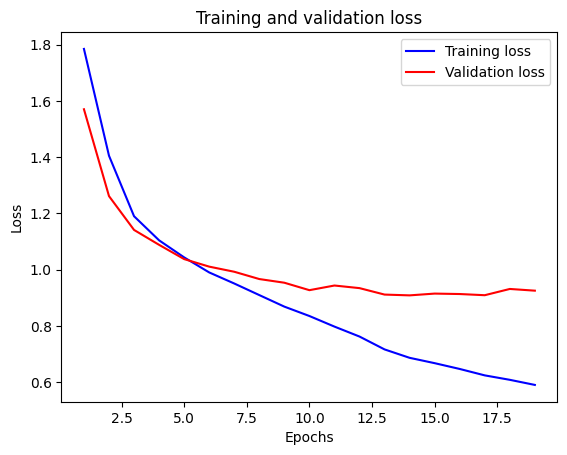

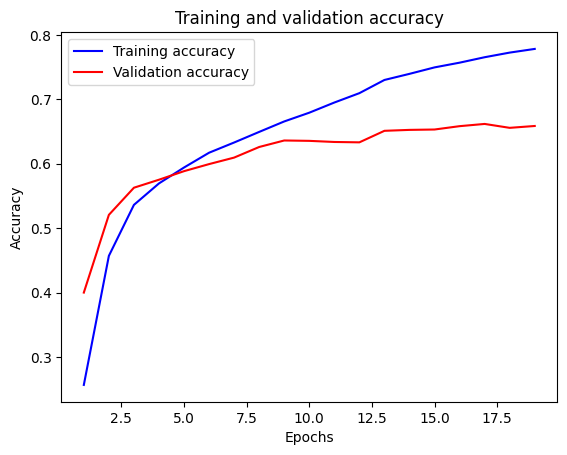

110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6587 - loss: 0.9070
Test Loss: 0.9229711890220642
Test Accuracy: 0.6452808380126953


In [ ]:
train_model(512)